# Dataset

## Loading the Dataset and Dataframe

In [1]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
    print("Original shape of the dataset:", df.shape)
except FileNotFoundError:
    print("Error: The file 'StudentPerformanceFactors.csv' was not found.")

Dataset loaded successfully.
Original shape of the dataset: (6607, 20)


In [2]:
print("\n--- Initial Data Inspection ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()


--- Initial Data Inspection ---
First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutor

Dataset loaded successfully.
Dataset shape: (6607, 20)

--- Generating Univariate Plots ---


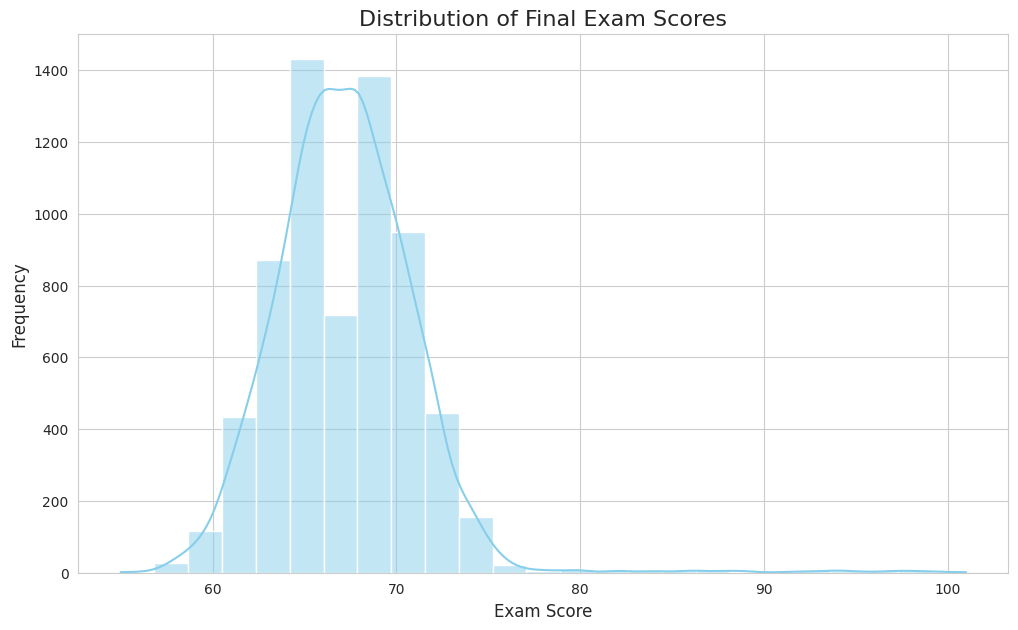

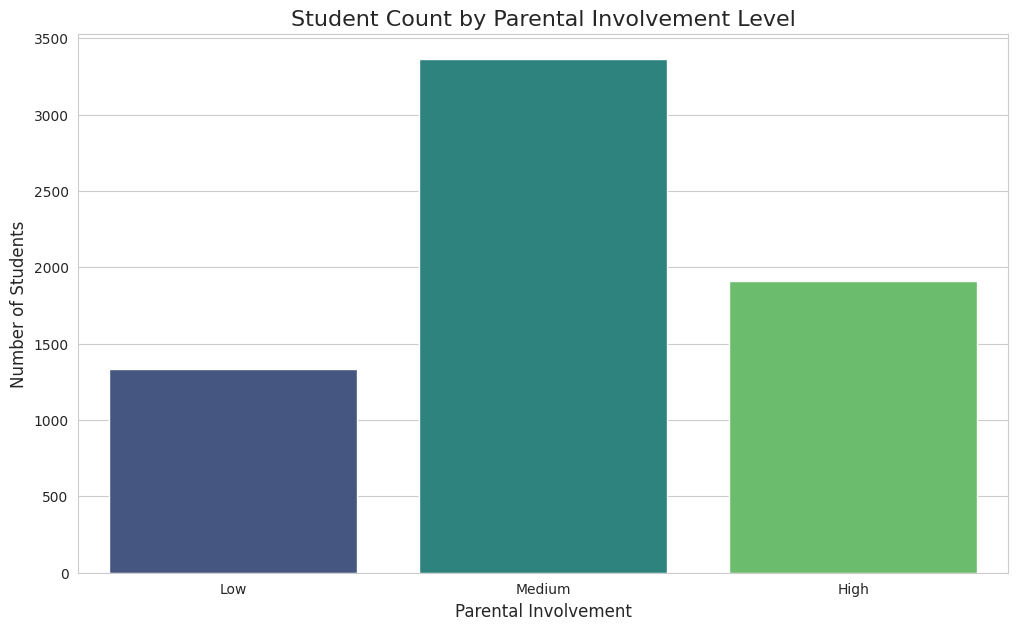


--- Generating Bivariate Plots ---


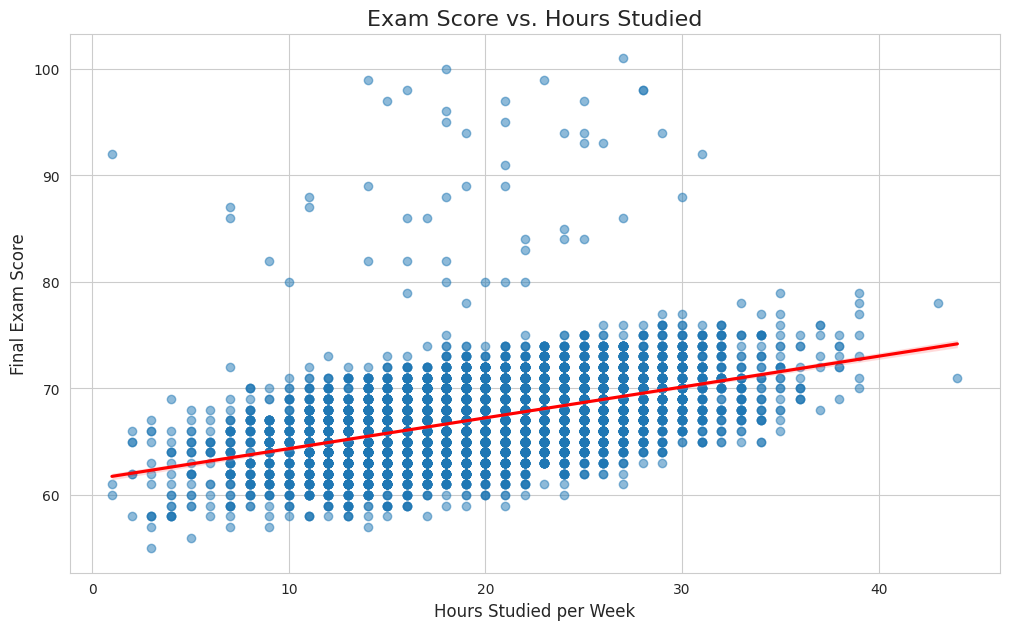

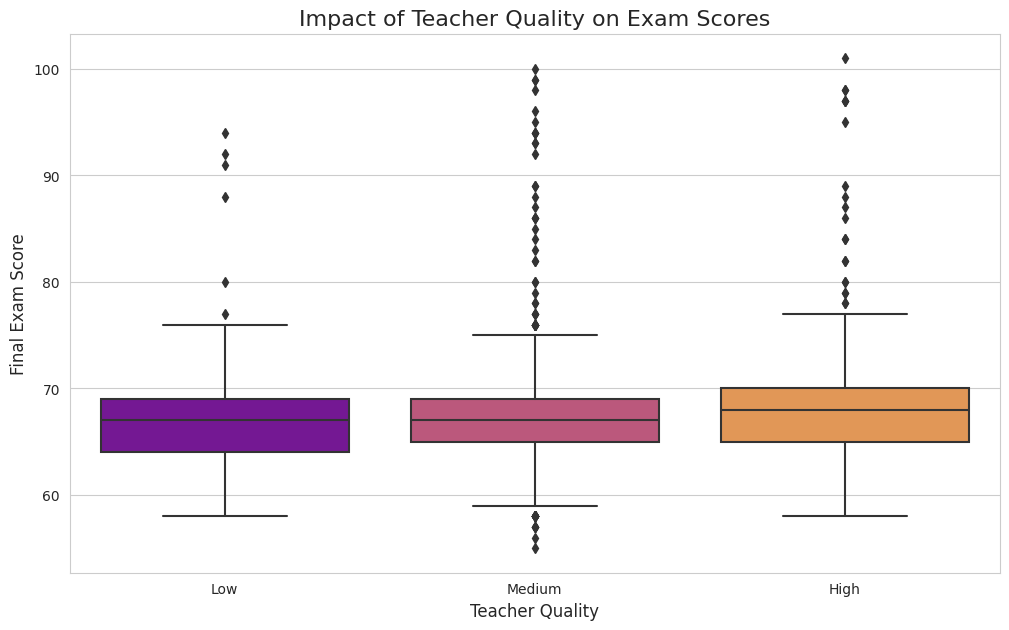

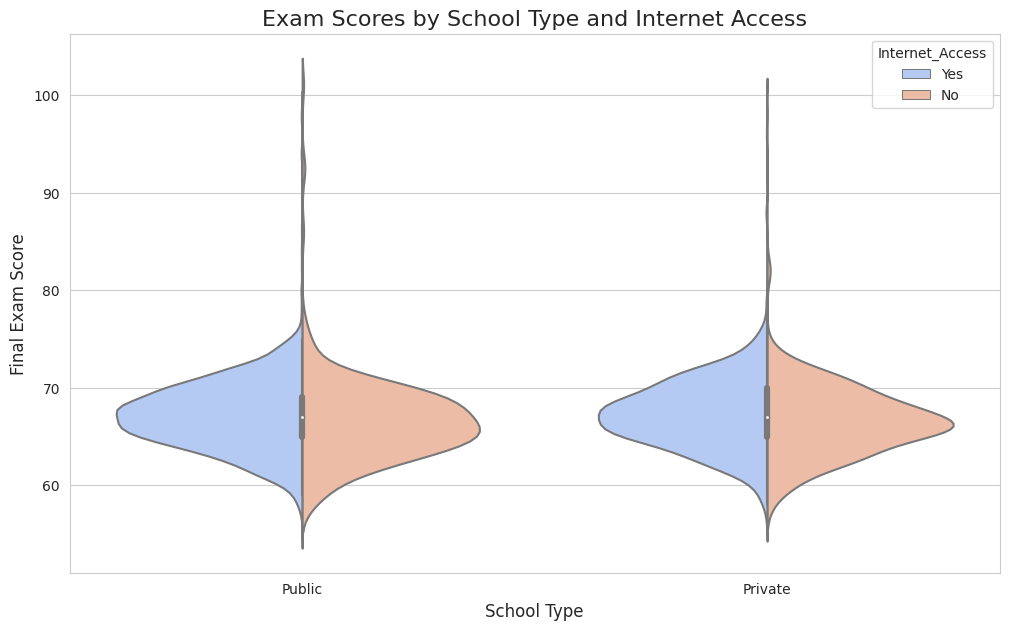


--- Generating Correlation Heatmap ---


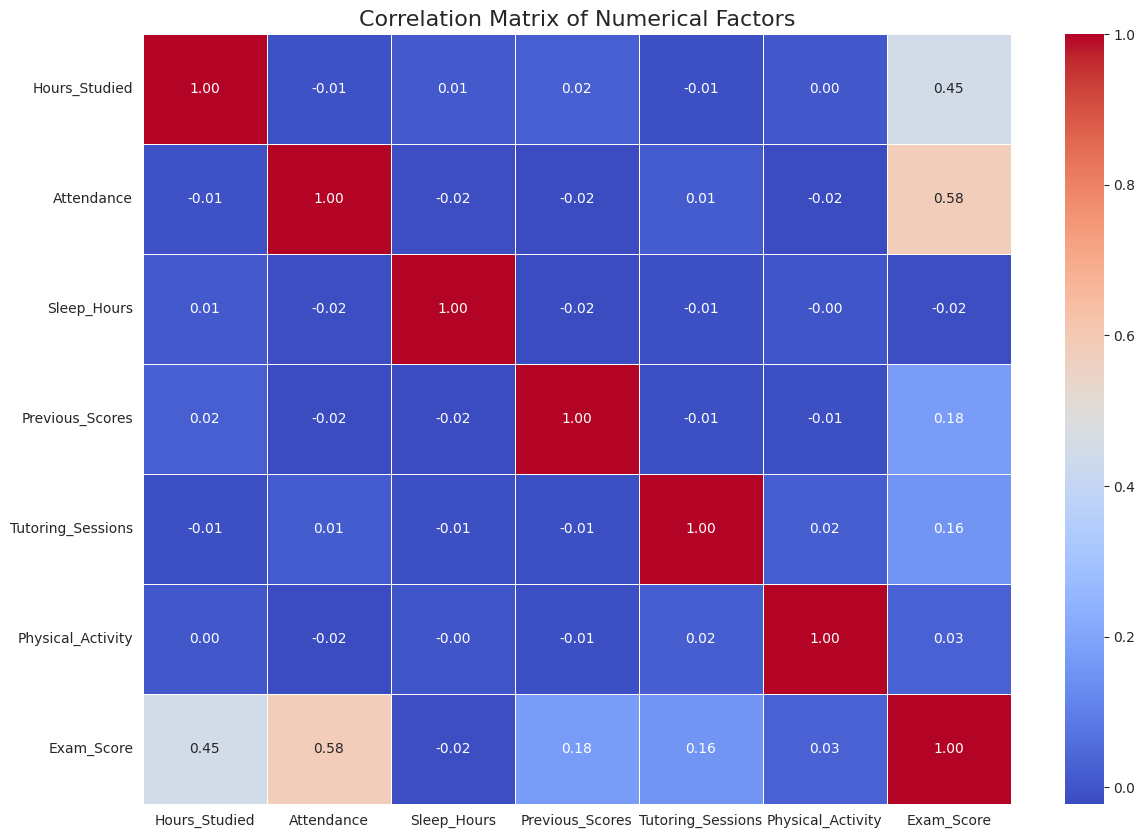


--- All visualizations have been generated. ---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("whitegrid")
# Set the default figure size for plots
plt.rcParams['figure.figsize'] = (12, 7)
# Suppress warnings that might clutter the output
warnings.filterwarnings('ignore')

try:
    df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: The file 'StudentPerformanceFactors.csv' was not found.")
    print("Please ensure the file path is correct.")

print("\n--- Generating Univariate Plots ---")
plt.figure(figsize=(12, 7))
sns.histplot(df['Exam_Score'], kde=True, bins=25, color='skyblue')
plt.title('Distribution of Final Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Parental_Involvement', order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Student Count by Parental Involvement Level', fontsize=16)
plt.xlabel('Parental Involvement', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()

print("\n--- Generating Bivariate Plots ---")

# Exam Score vs. Hours Studied
plt.figure(figsize=(12, 7))
sns.regplot(data=df, x='Hours_Studied', y='Exam_Score', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Exam Score vs. Hours Studied', fontsize=16)
plt.xlabel('Hours Studied per Week', fontsize=12)
plt.ylabel('Final Exam Score', fontsize=12)
plt.show()

# Exam Scores by Teacher Quality
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Teacher_Quality', y='Exam_Score', order=['Low', 'Medium', 'High'], palette='plasma')
plt.title('Impact of Teacher Quality on Exam Scores', fontsize=16)
plt.xlabel('Teacher Quality', fontsize=12)
plt.ylabel('Final Exam Score', fontsize=12)
plt.show()

# Exam Scores by School Type and Internet Access
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='School_Type', y='Exam_Score', hue='Internet_Access', split=True, palette='coolwarm')
plt.title('Exam Scores by School Type and Internet Access', fontsize=16)
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Final Exam Score', fontsize=12)
plt.show()


# --- Multivariate Analysis (Correlation Heatmap) ---
print("\n--- Generating Correlation Heatmap ---")

# Select only numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=np.number)
corr_matrix = numerical_cols.corr()

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Factors', fontsize=16)
plt.show()

print("\n--- All visualizations have been generated. ---")

## Data Cleaning

In [4]:
print("\n--- Handling Missing Values ---")
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])
print("No missing values found or they have been handled.")


--- Handling Missing Values ---
Missing values per column:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64
No missing values found or they have been handled.


In [5]:
print("\n--- Handling Duplicates ---")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
    print("Shape of dataset after removing duplicates:", df.shape)


--- Handling Duplicates ---
Number of duplicate rows found: 0


In [6]:
# The .info() command showed the data types. Most seem correct.
# Let's convert categorical columns to the 'category' type for efficiency.
print("\n--- Correcting Data Types ---")
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

print("Categorical columns converted to 'category' type.")
print("\nUpdated Dataset Information:")
df.info()


--- Correcting Data Types ---
Categorical columns converted to 'category' type.

Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality        

In [7]:
print("\n--- Outlier Identification ---")
print("Summary statistics for numerical columns:")
print(df.describe())
# A large difference between the 75th percentile and the max value could indicate outliers.


--- Outlier Identification ---
Summary statistics for numerical columns:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000   

In [8]:
# Save the cleaned dataframe to a new CSV file for the visualization step.
df.to_csv('/kaggle/working/cleaned_student_performance.csv', index=False)
print("\nCleaned data has been saved to '/kaggle/working/cleaned_student_performance.csv'")


Cleaned data has been saved to '/kaggle/working/cleaned_student_performance.csv'


## Splitting the Data into train and test

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from the specified path
try:
    df = pd.read_csv('/kaggle/working/cleaned_student_performance.csv')
except FileNotFoundError:
    print("Error: The file was not found. Please check the path and try again.")
# Selecting the features (X) and the target (y)
# Based on the dataset description, 'Hours_Studied' is our feature and 'Exam_Score' is the target.
X = df[['Hours_Studied']]
y = df['Exam_Score']

# Splitting the data into training and testing sets
# We will use 80% of the data for training and 20% for testing.
# The 'random_state' is set for reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the new dataframes to verify the split
print("\nShape of the training features (X_train):", X_train.shape)
print("Shape of the testing features (X_test):", X_test.shape)
print("Shape of the training target (y_train):", y_train.shape)
print("Shape of the testing target (y_test):", y_test.shape)


Shape of the training features (X_train): (5285, 1)
Shape of the testing features (X_test): (1322, 1)
Shape of the training target (y_train): (5285,)
Shape of the testing target (y_test): (1322,)


# Model

## Training a linear Regression Model

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

print("Linear regression model trained successfully! 🎉")

Linear regression model trained successfully! 🎉



Model Performance:
Mean Squared Error (MSE): 10.86
R-squared (R²): 0.23

Model Coefficients:
Intercept: 61.51
Coefficient (slope): 0.29

Visualization saved as 'linear_regression_results.png'


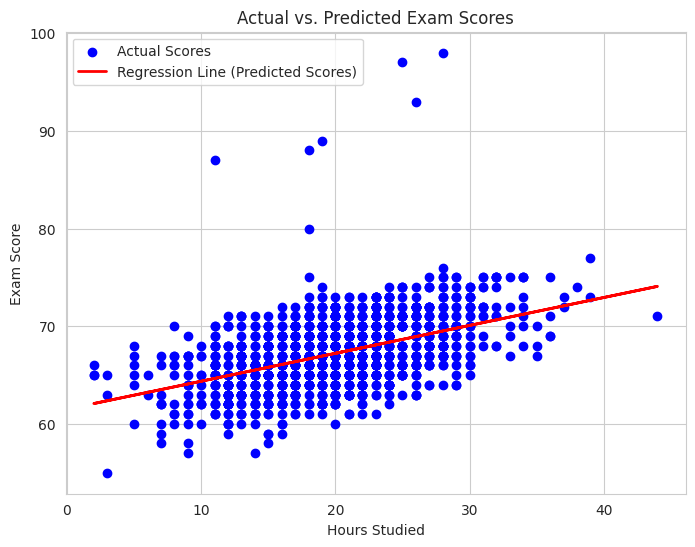

In [11]:
# Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# You can also print the model's learned coefficients
print(f"\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")


# 4. Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (Predicted Scores)')
plt.title('Actual vs. Predicted Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.savefig('linear_regression_results.png')

print("\nVisualization saved as 'linear_regression_results.png'")

R-squared (R²) = 0.23: This is the most important indicator here. It means that only 23% of the variation in exam scores can be explained by the hours a student studied. The remaining 77% is due to other factors your model doesn't account for (like sleep, prior knowledge, attendance, etc.). In predictive modeling, a good R² is typically much higher (often above 0.70). An R² of 0.23 indicates a very weak relationship between study hours and exam scores in your dataset.

Mean Squared Error (MSE) = 10.86: This number represents the average squared difference between the actual scores and your model's predicted scores. To make this easier to understand, let's look at the Root Mean Squared Error (RMSE), which is the square root of the MSE:

RMSE= 
sqrt(10.86)

​
 ≈3.30

This means, on average, your model's predictions are off by about 3.30 points. Whether this error is acceptable depends on the context, but combined with the very low R², it confirms the model's poor performance.

So , we need to try more effective ways than this to get better results:

# Bonus

## Trying Polynomial Regression

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# We will try a 2nd-degree polynomial.
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

print("Polynomial regression model trained successfully! 🥳")

Polynomial regression model trained successfully! 🥳



Polynomial Model Performance:
Mean Squared Error (MSE): 10.84
R-squared (R²): 0.23

Visualization saved as 'polynomial_regression_results.png'


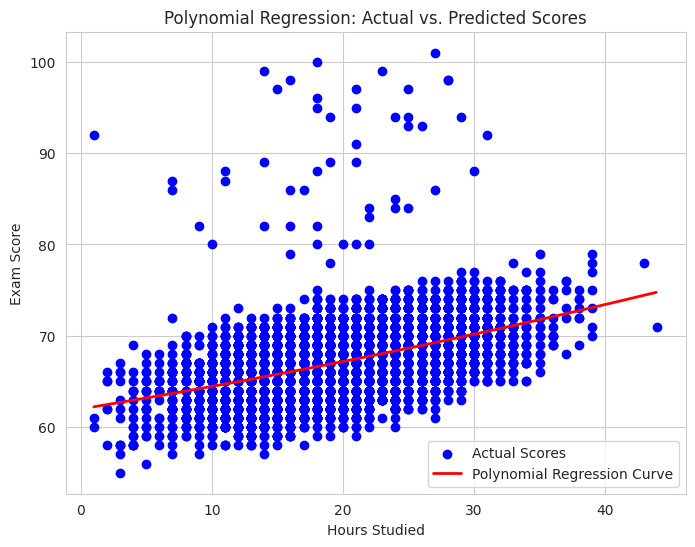

In [13]:
# Make Predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the New Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nPolynomial Model Performance:")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"R-squared (R²): {r2_poly:.2f}")


# Visualize the Polynomial Regression Curve
# To create a smooth curve, we'll generate more data points for the line
X_range = np.arange(X['Hours_Studied'].min(), X['Hours_Studied'].max(), 0.1).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = poly_model.predict(X_range_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Actual vs. Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.savefig('polynomial_regression_results.png')

print("\nVisualization saved as 'polynomial_regression_results.png'")

## Experimenting with different feature combinations

First, we need to convert our categorical features into a numerical format that the model can understand. We'll use one-hot encoding for this purpose.

In [14]:
# --- Feature Engineering for Multiple Regression ---

# Reload the cleaned dataset
try:
    df_cleaned = pd.read_csv('/kaggle/working/cleaned_student_performance.csv')
    print("Cleaned dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The cleaned dataset was not found. Please ensure the previous cells have run correctly.")

# Define the features (X) and the target (y)
# We will use all columns except for 'Exam_Score' as our features.
X_multi = df_cleaned.drop('Exam_Score', axis=1)
y_multi = df_cleaned['Exam_Score']

# Apply one-hot encoding to the categorical features
# This will convert columns like 'School_Type', 'Parental_Involvement', etc., into numerical format.
X_multi_encoded = pd.get_dummies(X_multi, drop_first=True)

print("\n--- Features after one-hot encoding ---")
print(X_multi_encoded.head())
print("\nShape of the encoded features:", X_multi_encoded.shape)

Cleaned dataset loaded successfully.

--- Features after one-hot encoding ---
   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Parental_Involvement_Low  Parental_Involvement_Medium  \
0                  3                      True                        False   
1                  4                      True                        False   
2                  4                     False                         True   
3                  4                      True                        False   
4                  4                    

> **Splitting the Data and Training the Multi-Feature Model**

Now that we have our processed features, we can split the data into training and testing sets and train our new multiple linear regression model.

In [15]:
# Split the data into training and testing sets (80/20 split)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi_encoded, y_multi, test_size=0.2, random_state=42
)

# Initialize and train the new Linear Regression model
multi_feature_model = LinearRegression()
multi_feature_model.fit(X_train_multi, y_train_multi)

print("Multiple linear regression model trained successfully! 🚀")

Multiple linear regression model trained successfully! 🚀


In [16]:
y_pred_multi = multi_feature_model.predict(X_test_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\n--- Multi-Feature Model Performance ---")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"R-squared (R²): {r2_multi:.2f}")

# Compare with the single-feature model's R-squared
print(f"\nImprovement over single-feature model's R² (0.23): {(r2_multi - 0.23):.2f}")


--- Multi-Feature Model Performance ---
Mean Squared Error (MSE): 3.26
R-squared (R²): 0.77

Improvement over single-feature model's R² (0.23): 0.54
